In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skopt import gp_minimize
from skopt.plots import plot_gaussian_process

In [2]:
np.random.seed(237)

In [3]:
# create hypothetical f(x) - response surfice function
# in this case it is a 1-D function with 1 x, that is, 1 hyperparameter

noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2))\
           + np.random.randn() * noise_level

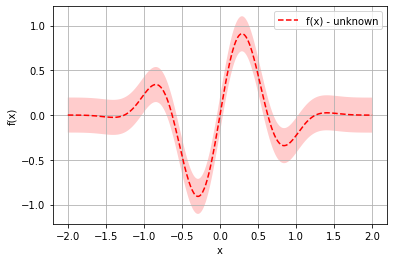

In [4]:
# Plot f(x) + uncertainty

x = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x_i, noise_level=0.0) for x_i in x]

plt.plot(x, fx, "r--", label="f(x) - unknown")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx],
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

In [5]:
res = gp_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f
                  n_random_starts=2,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=1234)  # the random seed

In [6]:
plt.rcParams["figure.figsize"] = (8, 30)

def f_wo_noise(x):
    return f(x, noise_level=0)

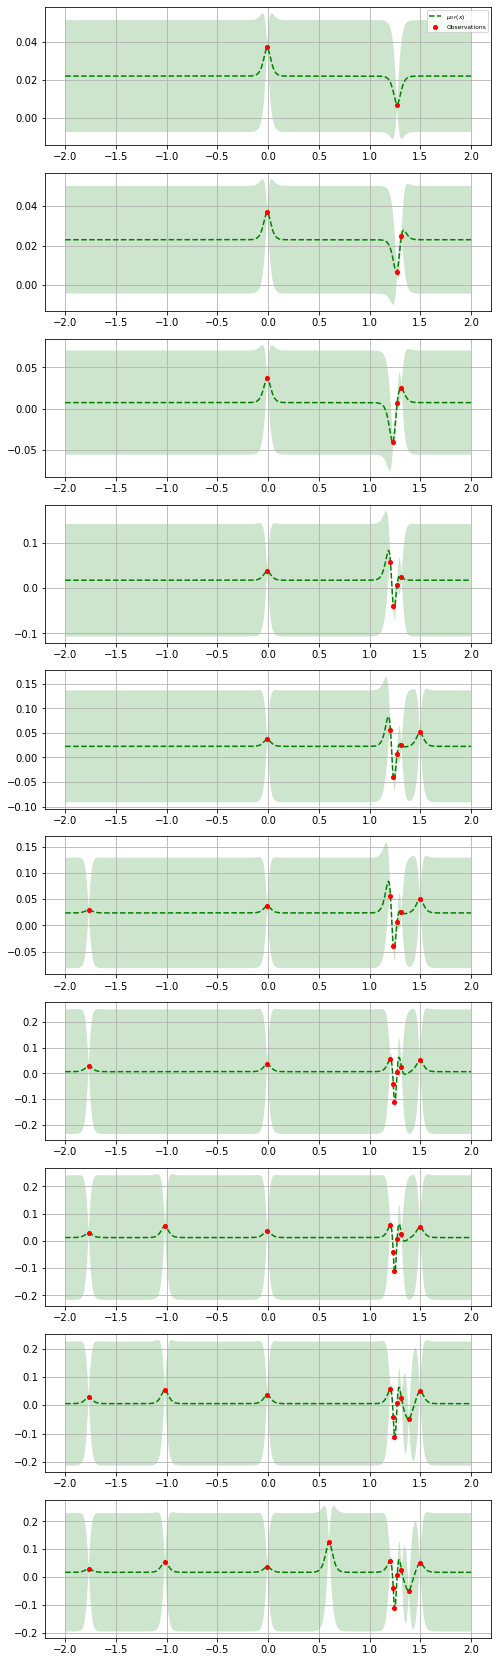

In [7]:
for n_iter in range(10):
    
    # Plot true function.
    plt.subplot(10, 1, n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(res,
                               n_calls=n_iter,
                               noise_level=noise_level,
                               show_legend=show_legend,
                               show_title=False,
                               show_next_point=False,
                               show_acq_func=False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
plt.show()

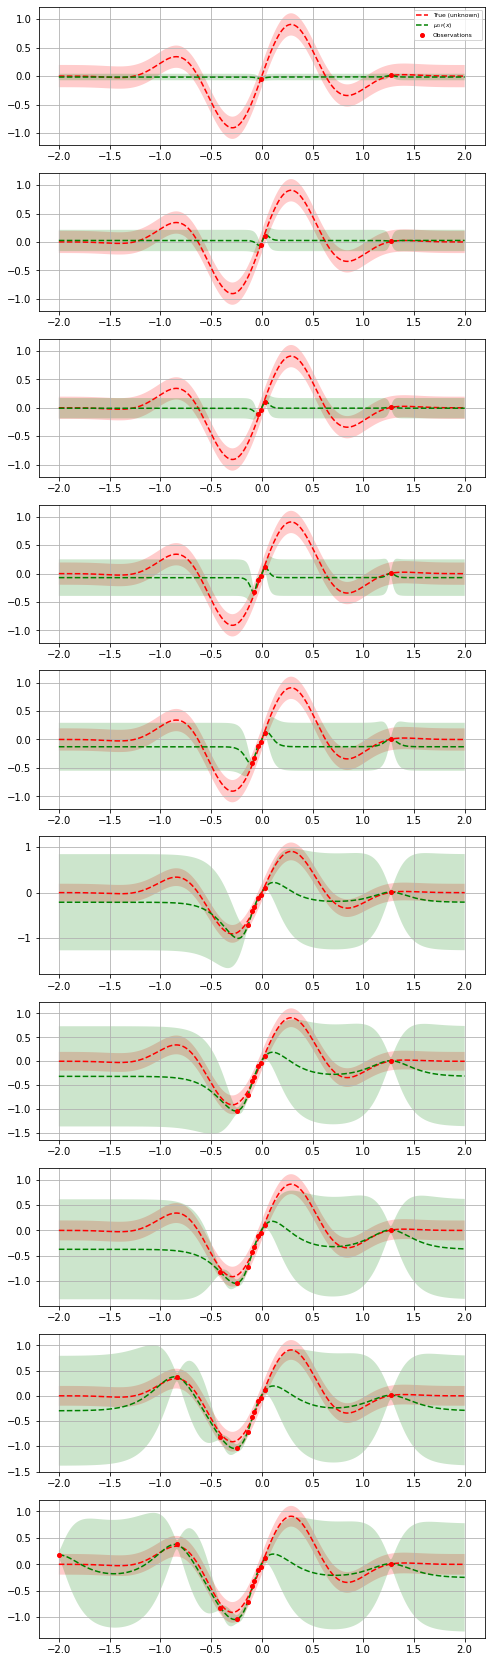

In [10]:
for n_iter in range(10):
    
    # Plot true function.
    plt.subplot(10, 1, n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(res,
                               n_calls=n_iter,
                               objective=f_wo_noise,
                               noise_level=noise_level,
                               show_legend=show_legend,
                               show_title=False,
                               show_next_point=False,
                               show_acq_func=False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
plt.show()

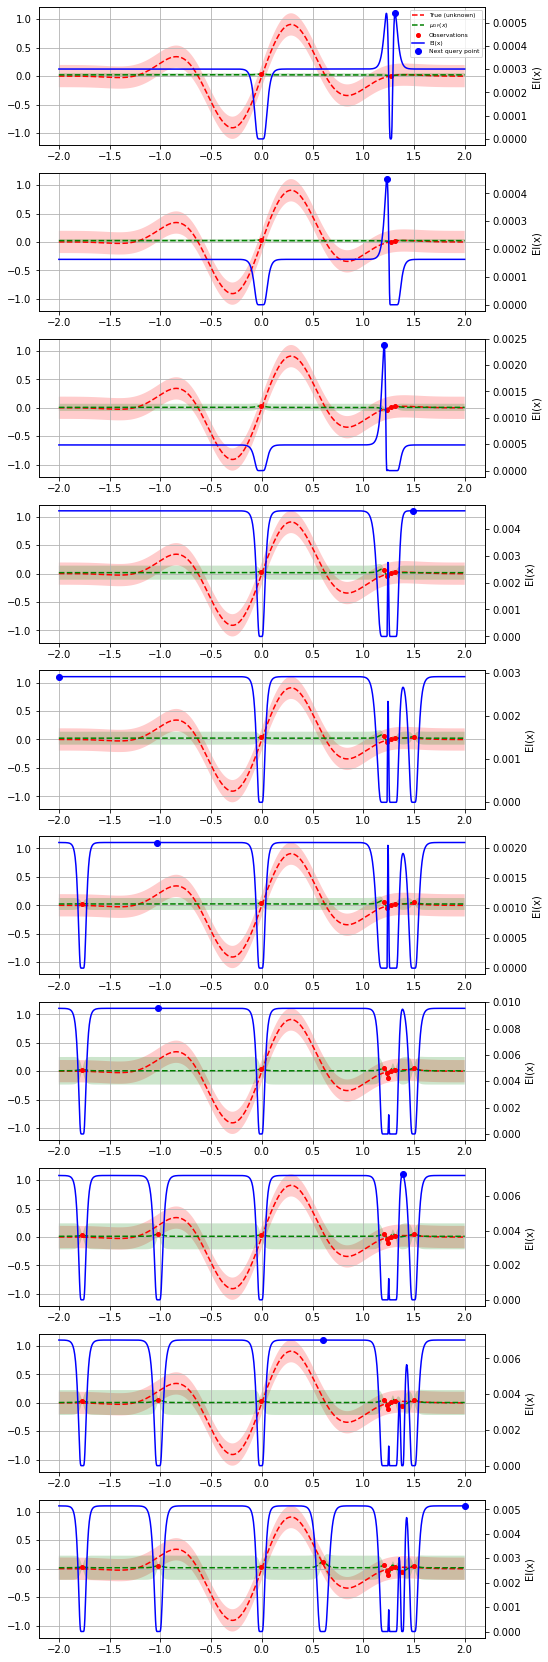

In [8]:
for n_iter in range(10):
    
    # Plot true function.
    plt.subplot(10, 1, n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(res,
                               n_calls=n_iter,
                               objective=f_wo_noise,
                               noise_level=noise_level,
                               show_legend=show_legend,
                               show_title=False,
                               show_next_point=True,
                               show_acq_func=True)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
plt.show()